In [ ]:
# Passo 1: Importar as bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Passo 2: Carregar o dataset Iris
iris = load_iris()
X = iris.data  # Características (comprimento e largura das pétalas e sépalas)
y = iris.target  # Rótulos (espécies das flores)

# Passo 3: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Passo 4: Treinar o modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Passo 5: Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

In [ ]:
# Passo 1: Importar as bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

# Passo 2: Carregar e preparar o dataset Iris
dataset = load_iris()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['species'] = dataset.target

# Passo 3: Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['species']))

# Passo 4: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['species'], test_size=0.3, random_state=42)

# Passo 5: Treinar e avaliar a Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_accuracy = accuracy_score(y_test, tree_model.predict(X_test))
print(f"Acurácia da Árvore de Decisão: {tree_accuracy * 100:.2f}%")

# Passo 6: Treinar e avaliar o KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
print(f"Acurácia do KNN: {knn_accuracy * 100:.2f}%")

Coeficiente angular (b1): 19.43
Intercepto (b0): 514.29

Métricas de avaliação:
R² no teste: 0.94
Erro Médio Absoluto (MAE): 7.39
Raiz do Erro Quadrático Médio (RMSE): 9.34

Média dos scores de validação cruzada: 0.95


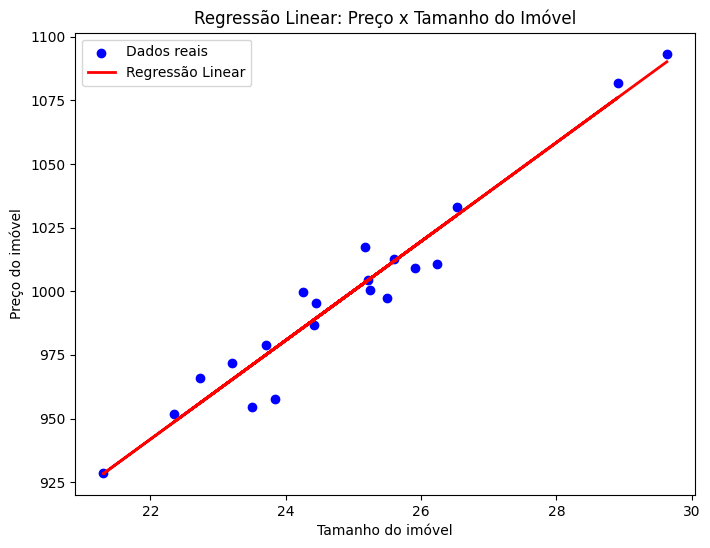

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Criando conjuntos de dados simulados
np.random.seed(42)
X = 2.5 * np.random.randn(100, 1) + 25  # Tamanho do imóvel
y = 500 + (X * 20) + np.random.randn(100, 1) * 10  # Preço do imóvel

# Definindo features e labels
features = X
labels = y

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Criando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Modelo de regressão linear
# Y = A X + B
# Y -> Variável de saída
# X -> Tamanho do imóvel
# A e B são coeficientes

# Coeficientes da regressão
print(f"Coeficiente angular (b1): {model.coef_[0][0]:.2f}")
print(f"Intercepto (b0): {model.intercept_[0]:.2f}")

# Predições nos dados de teste
y_pred = model.predict(X_test)

# Indicadores da Avaliação do modelo no conjunto de teste
#R² ajuste dos dados ao modelo
r2 = r2_score(y_test, y_pred)
#MAE (Erro Médio Absoluto)
mae = mean_absolute_error(y_test, y_pred)
#RMSE (Raiz do Erro Quadrático Médio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nMétricas de avaliação:")
print(f"R² no teste: {r2:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")

# Avaliação cruzada
cv_scores = cross_val_score(model, features, labels, cv=5, scoring='r2')
print(f"\nMédia dos scores de validação cruzada: {cv_scores.mean():.2f}")

# Gráfico da reta de regressão
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel("Tamanho do imóvel")
plt.ylabel("Preço do imóvel")
plt.title("Regressão Linear: Preço x Tamanho do Imóvel")
plt.legend()
plt.show()